<a href="https://colab.research.google.com/github/AmiMunshi/SpeechProcessingRecognition/blob/main/Assignment/SpeechRecognitionAssignment3_CNN_AudioSignal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem Statement
To design and build CNN model for identification of Dysarthria disease

Data:
https://www.kaggle.com/datasets/iamhungundji/dysarthria-detection
Create a Kaggle notebook in this dataset. Perform all the tasks in this notebook.
Task:
1. Read data.csv in pandas
2. For any 1 random sample of dysarthric male, dysarthric female, non-dysarthric male, and
non-dysarthric female, visualize
a. Waveplot
b. Spectrogram
c. Zero Crossing rate
d. Spectral Centroid and rolloff,
e. MFCC
f. Mel Spectrogram
3. Comment on the output.
4. Define a function to create 256 MFCC features for any given audio file.
5. Split the data into training and validation by a ratio of 90:10.
6. Build the CNN model with padding on a training set.
7. Evaluate the validation set.
8. Calculate and comment on ROC AUC score, recall score and confusion matrix

In [95]:
#Install Librosa
!pip install librosa

In [96]:
#Install opendatasets to get the dataset from Kaggle to colab
!pip install opendatasets

In [97]:
#Import opendatasets package and download the given dataset from Kaggle
import opendatasets as od

In [98]:
#Paste the Kaggle dataset link in download function below
od.download("https://www.kaggle.com/datasets/iamhungundji/dysarthria-detection")

Skipping, found downloaded files in "./dysarthria-detection" (use force=True to force download)


In [184]:
# importing libraries
import tensorflow as tf
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import librosa
import librosa
import librosa.display
from sklearn.preprocessing import minmax_scale
import IPython.display as ipd
import matplotlib.pyplot as plt
%matplotlib inline
import random
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

In [185]:
#Load the data frame
df= pd.read_csv("/content/dysarthria-detection/torgo_data/data.csv")

In [186]:
#Know more about the data
df.head()

,is_dysarthria,gender,filename
0,non_dysarthria,female,torgo_data/non_dysarthria_female/FC03_Session2...
1,non_dysarthria,female,torgo_data/non_dysarthria_female/FC02_Session3...
2,non_dysarthria,female,torgo_data/non_dysarthria_female/FC02_Session3...
3,non_dysarthria,female,torgo_data/non_dysarthria_female/FC03_Session2...
4,non_dysarthria,female,torgo_data/non_dysarthria_female/FC03_Session1...


In [189]:
#Know number of rows and columns in dataset
df.shape

(2000, 3)

In [190]:
#To know the column names
df.columns

Index(['is_dysarthria', 'gender', 'filename'], dtype='object')

#### Learning and experimenting

In [191]:
#Apply filter to get details no_dysathria female
df[(df['is_dysarthria']=='non_dysarthria') & (df["gender"]=="female")]

,is_dysarthria,gender,filename
0,non_dysarthria,female,torgo_data/non_dysarthria_female/FC03_Session2...
1,non_dysarthria,female,torgo_data/non_dysarthria_female/FC02_Session3...
2,non_dysarthria,female,torgo_data/non_dysarthria_female/FC02_Session3...
3,non_dysarthria,female,torgo_data/non_dysarthria_female/FC03_Session2...
4,non_dysarthria,female,torgo_data/non_dysarthria_female/FC03_Session1...
...,...,...,...
495,non_dysarthria,female,torgo_data/non_dysarthria_female/FC02_Session3...
496,non_dysarthria,female,torgo_data/non_dysarthria_female/FC03_Session1...
497,non_dysarthria,female,torgo_data/non_dysarthria_female/FC03_Session2...
498,non_dysarthria,female,torgo_data/non_dysarthria_female/FC03_Session2...


In [192]:
#Apply filter to get details no_dysathria female any one randomly selected
df[(df['is_dysarthria']=='non_dysarthria') & (df["gender"]=="female")].sample(n=1)

,is_dysarthria,gender,filename
314,non_dysarthria,female,torgo_data/non_dysarthria_female/FC02_Session3...


In [193]:
#Apply filter to get details no_dysathria female any one randomly selected, get the index
df[(df['is_dysarthria']=='non_dysarthria') & (df["gender"]=="female")].sample(n=1).index[0]

256

In [194]:
#Apply filter to get details no_dysathria female any one randomly selected, get the value in file name column

path=df[(df['is_dysarthria']=='non_dysarthria') & (df["gender"]=="female")].sample(n=1)["filename"].values[0]
print((path))

torgo_data/non_dysarthria_female/FC02_Session3_0429.wav


In [195]:
#Exploring split function
path = '/content/dysarthria-detection/torgo_data/dysarthria_female/F01_Session1_0001.wav'
#path.split('/')[-1].replace('.wav','').split('_')
print(path.split("/"))
print(path.split("/")[-1])
print(path.split("/")[-1].split("_"))
print(path.split("/")[-1].split("_"))

['', 'content', 'dysarthria-detection', 'torgo_data', 'dysarthria_female', 'F01_Session1_0001.wav']
F01_Session1_0001.wav
['F01', 'Session1', '0001.wav']
['F01', 'Session1', '0001.wav']


#### ************Learning finishes**************

In [196]:
#Create function to select an audio based on the query of the user

def select_audio(dys_feature, gender):
  df= pd.read_csv("/content/dysarthria-detection/torgo_data/data.csv")
  sample_path= df[(df['is_dysarthria']==dys_feature) & (df["gender"]==gender)].sample(n=1)["filename"].value[0]
  print(sample_path)
  return sample_path


In [197]:
#check to see if the function select_audio is working properly

#select_audio("non_dysarthria", "male")

In [198]:
#Take path of four randon samples from non_dysarthria, dysarthria, female and male
path1=df[(df['is_dysarthria']=='non_dysarthria') & (df["gender"]=="female")].sample(n=1)["filename"].values[0]
path2=df[(df['is_dysarthria']=='dysarthria') & (df["gender"]=="female")].sample(n=1)["filename"].values[0]
path3=df[(df['is_dysarthria']=='non_dysarthria') & (df["gender"]=="male")].sample(n=1)["filename"].values[0]
path4=df[(df['is_dysarthria']=='dysarthria') & (df["gender"]=="male")].sample(n=1)["filename"].values[0]

/content/dysarthria-detection/torgo_data/dysarthria_female/F01_Session1_0001.wav

### Display plots, Spectogram, zero crossing rate, centroid and roll off, MFCC and Mel Spectogram for these four signals

In [199]:
#Create a function to obtain x (amplitude) and sr(sampling rate) of the audio signal
def audio_features(path):
  x,sr=librosa.load(path)
  #convert audio signal to short term fourier transform
  return x,sr


In [200]:
#Put all the four paths in one list so that the function can be called iteratively for four paths
paths=[path1, path2, path3,path4]

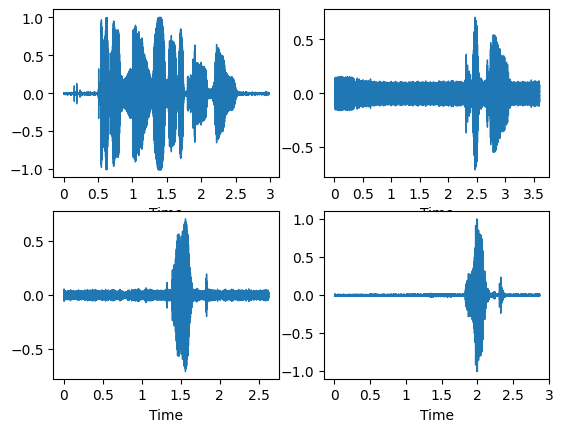

In [201]:
#to display plots

for i in range(len(paths)):
  #plt.figure(figsize=(20,5))
  x,sr= audio_features("/content/dysarthria-detection/"+paths[i])
  plt.subplot(2,2,i+1)
  librosa.display.waveshow(x,sr=sr)

<ipython-input-202-9a2303341717>:6: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  XdB= librosa.amplitude_to_db(X)


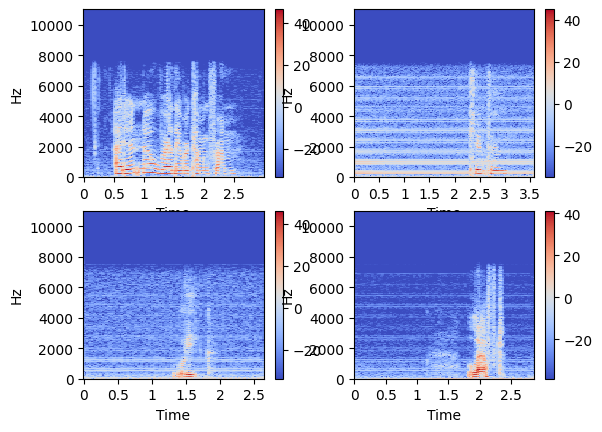

In [202]:
#To display spectogram
for i in range(len(paths)):

  x, sr= audio_features("/content/dysarthria-detection/"+paths[i])
  X= librosa.stft(x) #convert audio signal to short term fourier transform
  XdB= librosa.amplitude_to_db(X)
  plt.subplot(2,2,i+1)
  librosa.display.specshow(XdB, sr=sr, x_axis= "time", y_axis="hz")
  plt.colorbar()



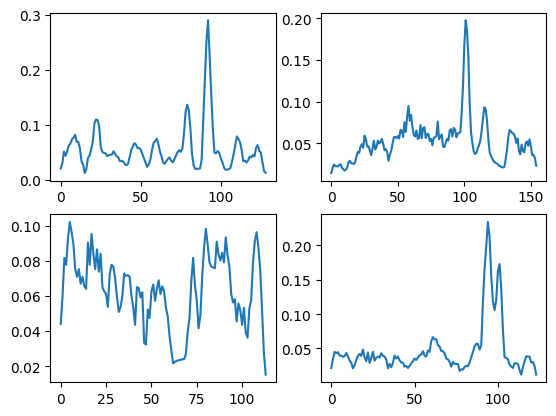

In [203]:
#Display zero crossing
for i in range(len(paths)):
  plt.subplot(2,2,i+1)
  x,sr= audio_features("/content/dysarthria-detection/"+paths[i])
  zero_crossing=librosa.zero_crossings(x)

  zcrs=librosa.feature.zero_crossing_rate(x)
  plt.plot(zcrs[0])


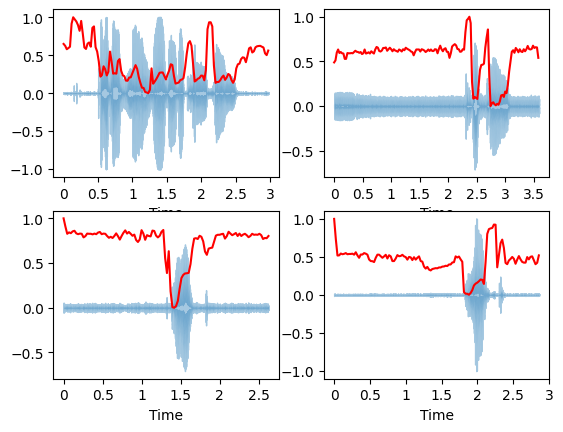

In [204]:
#Display for i in range(len(paths)):
for i in range(len(paths)):
  plt.subplot(2,2,i+1)
  x,sr= audio_features("/content/dysarthria-detection/"+paths[i])
  spectral_rolloffs=librosa.feature.spectral_rolloff(y=x, sr=sr)[0]
  frames=range(len(spectral_rolloffs))
  t=librosa.frames_to_time(frames)
  librosa.display.waveshow(x,sr=sr,alpha=0.4)
  plt.plot(t,minmax_scale(spectral_rolloffs), color="r")


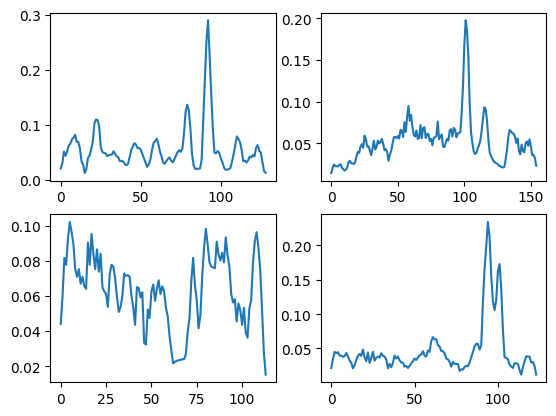

In [205]:
#Display zero crossing
for i in range(len(paths)):
  plt.subplot(2,2,i+1)
  x,sr= audio_features("/content/dysarthria-detection/"+paths[i])
  zero_crossing=librosa.zero_crossings(x)

  zcrs=librosa.feature.zero_crossing_rate(x)
  plt.plot(zcrs[0])


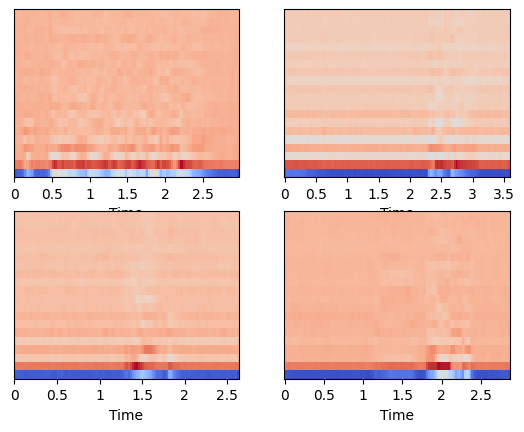

In [206]:
#Display MFCC
for i in range(len(paths)):
  plt.subplot(2,2,i+1)
  x,sr= audio_features("/content/dysarthria-detection/"+paths[i])
  mfccs = librosa.feature.mfcc(y=x, sr=sr)  # n_mfcc
  librosa.display.specshow(mfccs, sr=sr, x_axis='time')



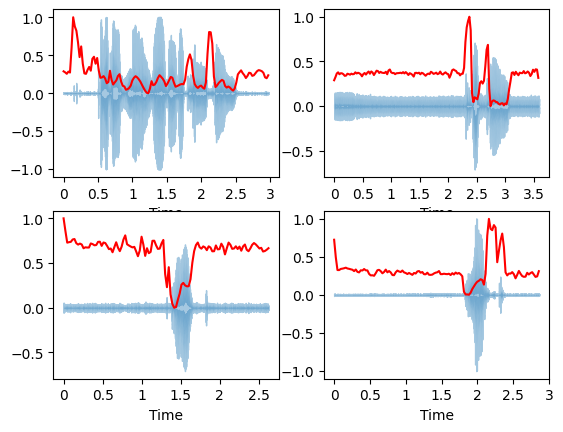

In [207]:
#Display Spectral Centroids
for i in range(len(paths)):
  plt.subplot(2,2,i+1)
  x,sr= audio_features("/content/dysarthria-detection/"+paths[i])
  spectral_centroids=librosa.feature.spectral_centroid(y=x, sr=sr)[0]
  frames=range(len(spectral_centroids))
  t=librosa.frames_to_time(frames)
  librosa.display.waveshow(x,sr=sr,alpha=0.4)
  plt.plot(t,minmax_scale(spectral_centroids), color="r")


###Modelling

In [208]:
#Function to creat mfcc features
def create_mfcc_features(path):
    mfccs = []
    try:
        #print("here")
        #print(path)
        x , sr = librosa.load(path)
        mfccs = librosa.feature.mfcc(y=x, sr=sr, n_mfcc=128)
        mfccs = np.mean(mfccs.T,axis=0)
    except:
        pass
        #print('Error reading audio')
    return mfccs

In [209]:
#We need to prepend the path as entire path is not there in the column
df["filename"]= "/content/dysarthria-detection/"+df["filename"]

In [210]:
#df["filename"]

In [211]:
#MFCC features will be saved in the dataframe
X_df = pd.DataFrame(df['filename'].apply(lambda x: create_mfcc_features(x)).tolist())
X_df.head()

<ipython-input-208-0b936c8f652b>:7: UserWarning: PySoundFile failed. Trying audioread instead.
  x , sr = librosa.load(path)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=209
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=583
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=581
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=185
  w

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,-221.788269,101.259232,-16.548132,38.492065,-13.595653,20.772554,-5.536349,10.410690,1.962461,-0.799047,...,1.363241,0.962193,0.744855,1.058080,0.388451,0.081758,0.546172,0.594357,0.170033,-0.219215
1,-299.520081,109.872574,-17.097269,38.854969,-16.881130,22.959133,1.824228,18.724188,3.448541,4.455822,...,1.329316,1.105589,1.056284,1.252576,0.027333,-1.368948,-0.037859,0.020661,-0.082124,-0.744832
2,-302.950043,112.048477,-23.679882,44.887413,-22.434727,26.299335,0.811477,18.210291,4.344697,4.912156,...,0.993410,0.844332,0.530004,1.018391,0.055385,-1.472088,0.295324,0.191228,-0.224301,-0.582725
3,-210.861603,116.504486,-35.046494,37.670425,-27.112516,25.593727,-7.511986,13.140750,-0.587347,4.138087,...,1.068848,0.630752,0.898457,0.721398,0.174576,-0.090706,0.001524,0.360464,-0.075448,-0.259715
4,-280.227203,104.505035,-17.209877,45.064884,-15.542122,28.115068,-3.449209,16.841436,4.573242,1.738296,...,1.486205,1.596206,0.970084,0.732015,0.547593,-0.152664,0.131893,-0.288228,-0.468570,-0.461726


In [212]:
#Total2000 samples with 128 features  is saved in X_df dataframe
X_df.shape

(2000, 128)

In [213]:
#Scale the features to normalize it. Otherwise accuracy will be low
scaler = StandardScaler()
X_df = scaler.fit_transform(X_df)


In [214]:
#y is to be converted to number. Hence using label encoding
encoder = LabelEncoder()
encoder.fit(df['is_dysarthria'])
y = encoder.transform(df['is_dysarthria'])

In [215]:
#Split the data into train and test
x_train, x_val, y_train, y_val = train_test_split(np.array(X_df), y, test_size=0.3)

In [216]:
x_train.shape, x_val.shape

((1400, 128), (600, 128))

In [217]:
### reshape x_train and x_val as we want to use CNN so we have to make the dataset to be like image
x_train = x_train.reshape(x_train.shape[0], 16, 8, 1)
x_val = x_val.reshape(x_val.shape[0], 16, 8, 1)

### CNN model

In [218]:
#Create the model
tf.keras.backend.clear_session() #Release any resources
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(16, 8, 1)),
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu', padding = "same"),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(filters=8, kernel_size=(3, 3), activation='relu', padding = "same"),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(len(df['is_dysarthria'].unique()), activation='sigmoid')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 16, 8, 16)         160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 8, 4, 16)         0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 4, 8)           1160      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 2, 8)          0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 16)                1

In [225]:
len(df['is_dysarthria'].unique())

2

In [226]:
#Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [227]:
#train the model for 10 epochs
epoch = 10

history = model.fit(x_train, y_train,validation_split=0.33, epochs=epoch)

Epoch 1/10
30/30 [==============================] - 1s 14ms/step - loss: 0.5881 - accuracy: 0.7086 - val_loss: nan - val_accuracy: 0.7862
Epoch 2/10
30/30 [==============================] - 0s 7ms/step - loss: 0.4859 - accuracy: 0.7652 - val_loss: nan - val_accuracy: 0.8013
Epoch 3/10
30/30 [==============================] - 0s 8ms/step - loss: 0.4179 - accuracy: 0.8036 - val_loss: nan - val_accuracy: 0.8337
Epoch 4/10
30/30 [==============================] - 0s 8ms/step - loss: 0.3532 - accuracy: 0.8623 - val_loss: nan - val_accuracy: 0.8596
Epoch 5/10
30/30 [==============================] - 0s 8ms/step - loss: 0.3036 - accuracy: 0.8805 - val_loss: nan - val_accuracy: 0.8747
Epoch 6/10
30/30 [==============================] - 0s 8ms/step - loss: 0.2506 - accuracy: 0.9125 - val_loss: nan - val_accuracy: 0.8963
Epoch 7/10
30/30 [==============================] - 0s 8ms/step - loss: 0.2096 - accuracy: 0.9189 - val_loss: nan - val_accuracy: 0.9222
Epoch 8/10
30/30 [======================

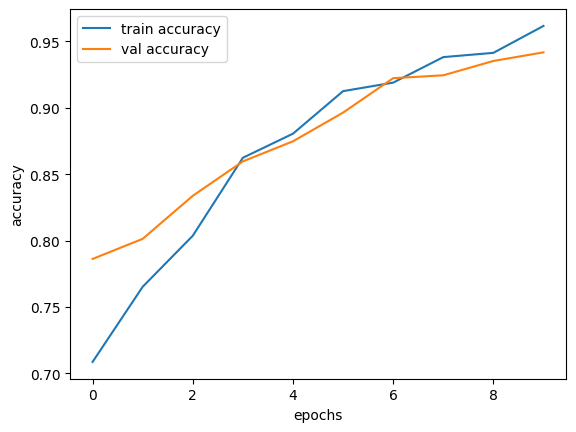

In [228]:
#Plot accuracy

epochs = list(range(epoch))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

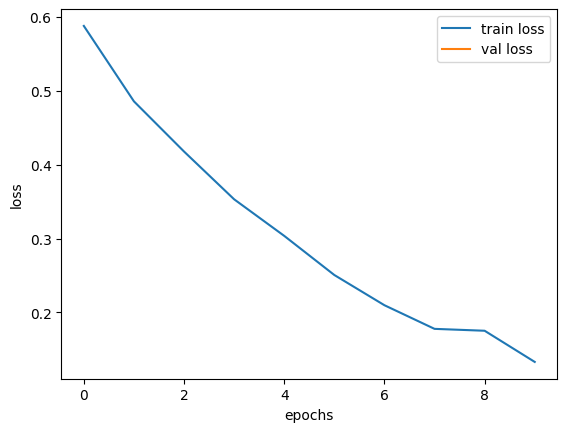

In [230]:
# Display the loss and validation loss graph
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [231]:
model.evaluate(x_val, y_val)

19/19 [==============================] - 0s 4ms/step - loss: 0.1527 - accuracy: 0.9500


[0.15268446505069733, 0.949999988079071]

In [232]:
y_pred  = model.predict(x_val)
y_pred_labels = np.argmax(y_pred, axis=1) #Index of max  value

19/19 [==============================] - 0s 2ms/step


In [236]:
y_pred_labels

array([0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,

In [239]:
print(classification_report(y_val, y_pred_labels,target_names=["Non_dysarthria", "Dysarthria"]))

                precision    recall  f1-score   support

Non_dysarthria       0.96      0.93      0.95       286
    Dysarthria       0.94      0.97      0.95       314

      accuracy                           0.95       600
     macro avg       0.95      0.95      0.95       600
  weighted avg       0.95      0.95      0.95       600



In [240]:
confusion_matrix(y_val, y_pred_labels)

array([[266,  20],
       [ 10, 304]])